<p style="text-align:center">
    <a href="https://skills.network/?utm_medium=Exinfluencer&utm_source=Exinfluencer&utm_content=000026UJ&utm_term=10006555&utm_id=NA-SkillsNetwork-Channel-SkillsNetworkCoursesIBMDeveloperSkillsNetworkST0151ENSkillsNetwork20531532-2022-01-01" target="_blank">
    <img src="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/assets/logos/SN_web_lightmode.png" width="200" alt="Skills Network Logo"  />
    </a>
</p>



#### Import the required libraries we need for the lab.


In [1]:
import piplite
await piplite.install(['numpy'],['pandas'])
await piplite.install(['seaborn'])

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as pyplot
import scipy.stats
import statsmodels.api as sm
from statsmodels.formula.api import ols

<ipython-input-2-e727555865e1>:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


#### Read the dataset in the csv file from the URL


In [3]:
from js import fetch
import io

URL = 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-ST0151EN-SkillsNetwork/labs/boston_housing.csv'
resp = await fetch(URL)
boston_url = io.BytesIO((await resp.arrayBuffer()).to_py())

In [4]:
boston_df=pd.read_csv(boston_url)

In [5]:
boston_df.head()

,Unnamed: 0,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,LSTAT,MEDV
0,0,0.00632,18.0,2.31,0.0,0.538,6.575,65.2,4.0900,1.0,296.0,15.3,4.98,24.0
1,1,0.02731,0.0,7.07,0.0,0.469,6.421,78.9,4.9671,2.0,242.0,17.8,9.14,21.6
2,2,0.02729,0.0,7.07,0.0,0.469,7.185,61.1,4.9671,2.0,242.0,17.8,4.03,34.7
3,3,0.03237,0.0,2.18,0.0,0.458,6.998,45.8,6.0622,3.0,222.0,18.7,2.94,33.4
4,4,0.06905,0.0,2.18,0.0,0.458,7.147,54.2,6.0622,3.0,222.0,18.7,5.33,36.2


#### Add your code below following the instructions given in the course to complete the peer graded assignment


### **1. Visualisations**


***A. Diagramme en boîte de la "Valeur médiane des logements occupés par leur propriétaire" (MEDV)***

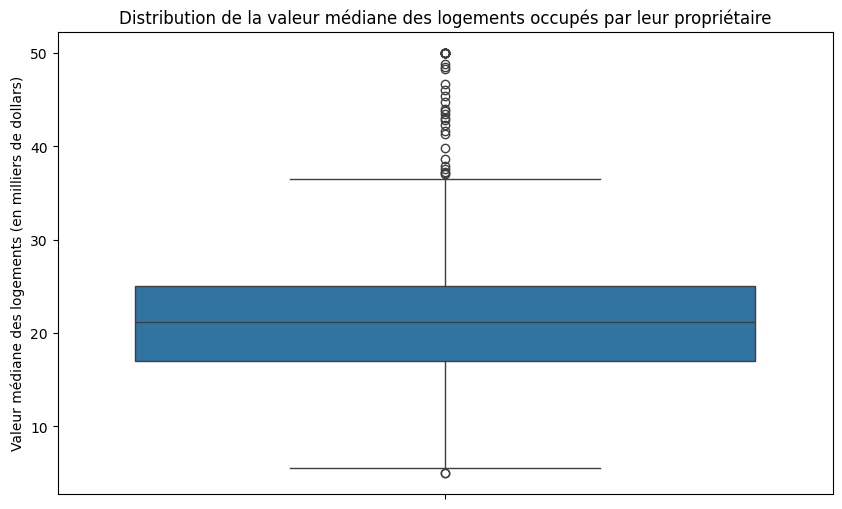

In [6]:
pyplot.figure(figsize=(10, 6))
sns.boxplot(y=boston_df['MEDV'])
pyplot.title('Distribution de la valeur médiane des logements occupés par leur propriétaire')
pyplot.ylabel('Valeur médiane des logements (en milliers de dollars)')
pyplot.show()

***B. Diagramme à barres pour la variable Charles River (CHAS)***

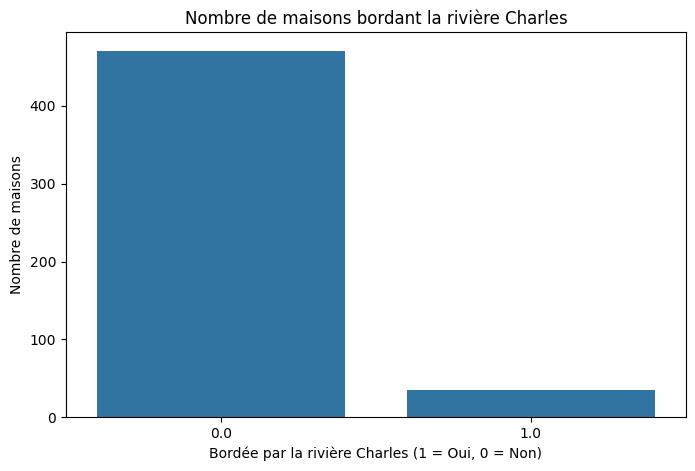

In [7]:
pyplot.figure(figsize=(8, 5))
sns.countplot(x=boston_df['CHAS'])
pyplot.title('Nombre de maisons bordant la rivière Charles')
pyplot.xlabel('Bordée par la rivière Charles (1 = Oui, 0 = Non)')
pyplot.ylabel('Nombre de maisons')
pyplot.show()

***C. Diagramme en boîte pour MEDV par rapport à AGE (discrétisé)***

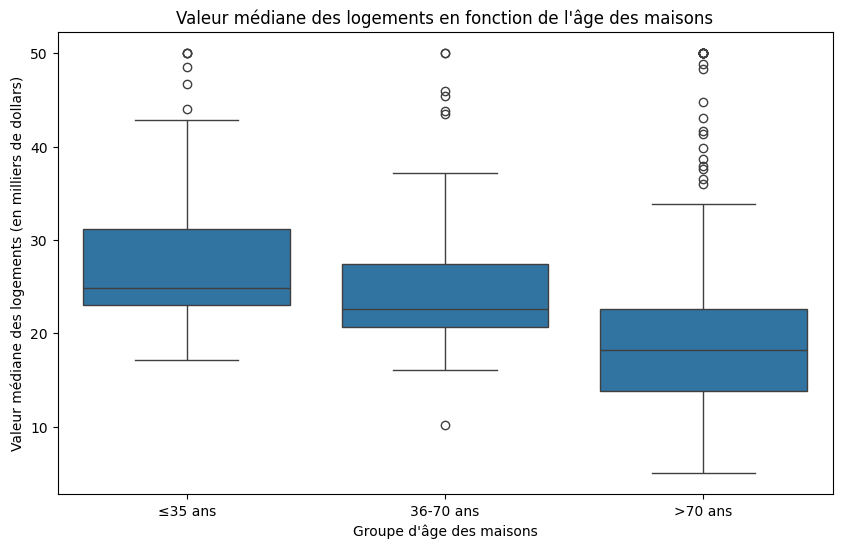

In [8]:
bins = [0, 35, 70, np.inf]
labels = ['≤35 ans', '36-70 ans', '>70 ans']
boston_df['AGE_group'] = pd.cut(boston_df['AGE'], bins=bins, labels=labels, right=False)

pyplot.figure(figsize=(10, 6))
sns.boxplot(x='AGE_group', y='MEDV', data=boston_df)
pyplot.title('Valeur médiane des logements en fonction de l\'âge des maisons')
pyplot.xlabel('Groupe d\'âge des maisons')
pyplot.ylabel('Valeur médiane des logements (en milliers de dollars)')
pyplot.show()

***D. Diagramme de dispersion pour NOX vs INDUS***

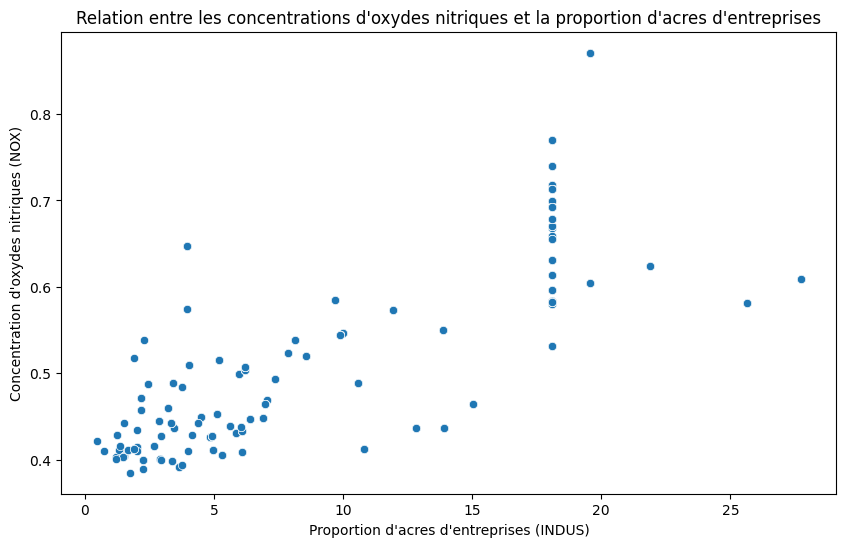

In [9]:
pyplot.figure(figsize=(10, 6))
sns.scatterplot(x='INDUS', y='NOX', data=boston_df)
pyplot.title('Relation entre les concentrations d\'oxydes nitriques et la proportion d\'acres d\'entreprises')
pyplot.xlabel('Proportion d\'acres d\'entreprises (INDUS)')
pyplot.ylabel('Concentration d\'oxydes nitriques (NOX)')
pyplot.show()

***E. Histogramme pour la variable "PTRATIO" (ratio élèves/enseignants)***

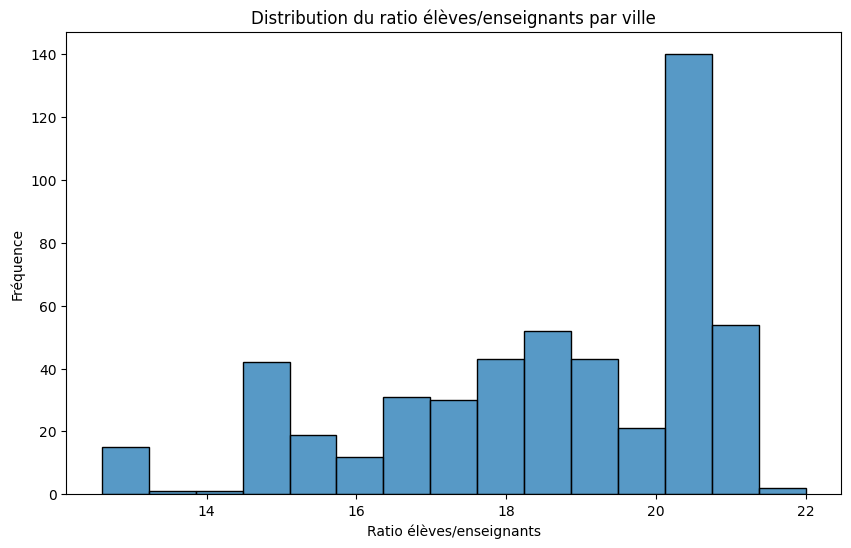

In [10]:
pyplot.figure(figsize=(10, 6))
sns.histplot(boston_df['PTRATIO'], bins=15, kde=False)
pyplot.title('Distribution du ratio élèves/enseignants par ville')
pyplot.xlabel('Ratio élèves/enseignants')
pyplot.ylabel('Fréquence')
pyplot.show()

### **2. Tests statistiques**

***A. Différence significative dans la valeur médiane des maisons bordées par la rivière Charles (CHAS)***


In [11]:
chas_yes = boston_df[boston_df['CHAS'] == 1]['MEDV']
chas_no = boston_df[boston_df['CHAS'] == 0]['MEDV']

t_stat, p_value = scipy.stats.ttest_ind(chas_yes, chas_no, equal_var=False)

print(f"Statistique T : {t_stat}")
print(f"Valeur p : {p_value}")

if p_value < 0.05:
    print("Il existe une différence significative dans la valeur médiane des maisons bordées par la rivière Charles.")
else:
    print("Il n'y a pas de différence significative dans la valeur médiane des maisons bordées par la rivière Charles.")

Statistique T : 3.113291312794837
Valeur p : 0.003567170098137517
Il existe une différence significative dans la valeur médiane des maisons bordées par la rivière Charles.


***B. Différence dans les valeurs médianes des maisons selon AGE (ANOVA)***

In [12]:
anova_result = scipy.stats.f_oneway(
    boston_df[boston_df['AGE_group'] == '≤35 ans']['MEDV'],
    boston_df[boston_df['AGE_group'] == '36-70 ans']['MEDV'],
    boston_df[boston_df['AGE_group'] == '>70 ans']['MEDV']
)

print(f"Statistique F : {anova_result.statistic}")
print(f"Valeur p : {anova_result.pvalue}")

if anova_result.pvalue < 0.05:
    print("Il existe une différence significative entre les valeurs médianes des maisons pour les différents groupes d'âge.")
else:
    print("Il n'y a pas de différence significative entre les valeurs médianes des maisons pour les différents groupes d'âge.")

Statistique F : 36.40764999196599
Valeur p : 1.7105011022702984e-15
Il existe une différence significative entre les valeurs médianes des maisons pour les différents groupes d'âge.


***C. Relation entre NOX et INDUS (corrélation de Pearson)***

In [13]:
corr_coef, p_value = scipy.stats.pearsonr(boston_df['NOX'], boston_df['INDUS'])

print(f"Coefficient de corrélation de Pearson : {corr_coef}")
print(f"Valeur p : {p_value}")

if p_value < 0.05:
    print("Il existe une relation significative entre NOX et INDUS.")
else:
    print("Il n'y a pas de relation significative entre NOX et INDUS.")

Coefficient de corrélation de Pearson : 0.7636514469209192
Valeur p : 7.913361061210442e-98
Il existe une relation significative entre NOX et INDUS.


***D. Impact de la distance pondérée (DIS) sur la valeur médiane des maisons (régression)***

In [14]:
X = boston_df['DIS']
y = boston_df['MEDV']

X = sm.add_constant(X)

model = sm.OLS(y, X).fit()
print(model.summary())

if model.pvalues['DIS'] < 0.05:
    print("La distance pondérée (DIS) a un impact significatif sur la valeur médiane des maisons.")
else:
    print("La distance pondérée (DIS) n'a pas d'impact significatif sur la valeur médiane des maisons.")

                            OLS Regression Results                            
Dep. Variable:                   MEDV   R-squared:                       0.062
Model:                            OLS   Adj. R-squared:                  0.061
Method:                 Least Squares   F-statistic:                     33.58
Date:                Wed, 04 Sep 2024   Prob (F-statistic):           1.21e-08
Time:                        17:30:28   Log-Likelihood:                -1823.9
No. Observations:                 506   AIC:                             3652.
Df Residuals:                     504   BIC:                             3660.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const         18.3901      0.817     22.499      0.0

***E.Carte thermique des corrélations entre les variables***

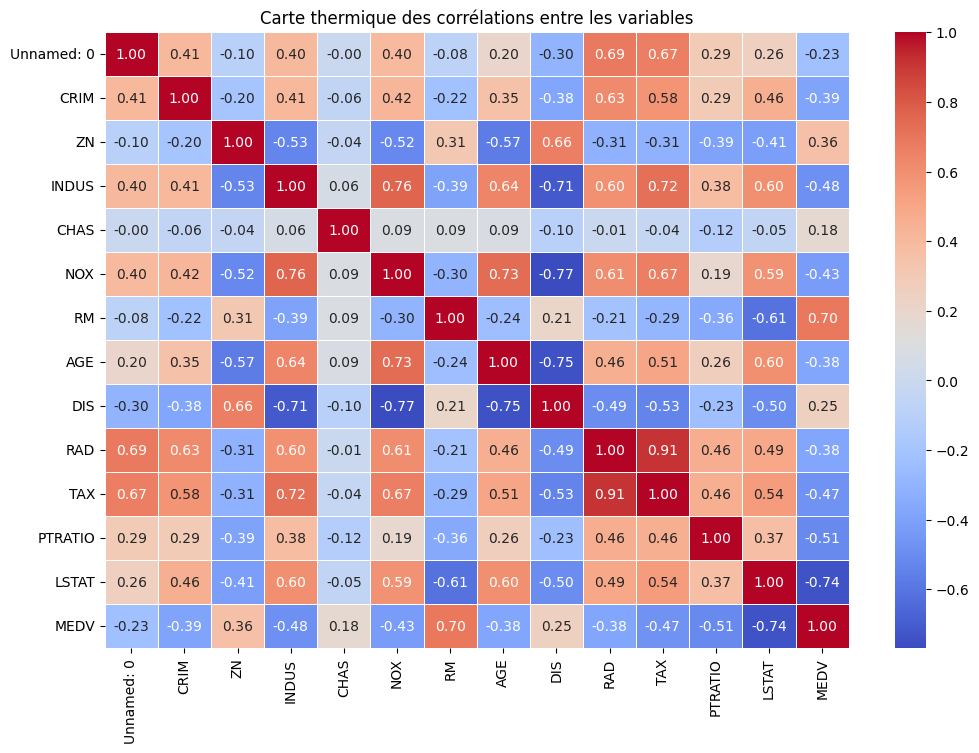

In [16]:
numeric_df = boston_df.select_dtypes(include=['float64', 'int64'])
corr_matrix = numeric_df.corr()

pyplot.figure(figsize=(12, 8))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', fmt=".2f", linewidths=0.5) 
pyplot.title('Carte thermique des corrélations entre les variables')
pyplot.show()